In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
import sys
print(sys.executable)
!<path-to-the-executable>/python -m pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

C:\Users\li5me\Anaconda3\python.exe


The system cannot find the file specified.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet


In [4]:
news = pd.read_csv("./new.csv")

In [5]:
news.head()

,Unnamed: 0,authors,title,publish_timestamp,description,text,url,title_length,description_length,text_length,data,time
0,1,['Cbc News'],Coronavirus a 'wake-up call' for Canada's pres...,2020-03-27 08:00:00,Canadian pharmacies are limiting how much medi...,Canadian pharmacies are limiting how much medi...,https://www.cbc.ca/news/health/covid-19-drug-s...,66,248,2600,2020-03-27,08:00:00
1,2,['Cbc News'],Yukon gov't names 2 possible sources of corona...,2020-03-27 01:45:00,The Yukon government has identified two places...,The Yukon government has identified two places...,https://www.cbc.ca/news/canada/north/yukon-cor...,60,168,1843,2020-03-27,01:45:00
2,3,['The Associated Press'],U.S. Senate passes $2T coronavirus relief package,2020-03-26 05:13:00,The Senate has passed an unparalleled $2.2 tri...,The Senate late Wednesday passed an unparallel...,https://www.cbc.ca/news/world/senate-coronavir...,49,172,6185,2020-03-26,05:13:00
3,4,['Cbc News'],Coronavirus: The latest in drug treatment and ...,2020-03-27 00:36:00,Scientists around the world are racing to find...,Scientists around the world are racing to find...,https://www.cbc.ca/news/health/coronavirus-tre...,65,159,5011,2020-03-27,00:36:00
4,5,['Cbc News'],The latest on the coronavirus outbreak for Mar...,2020-03-26 20:57:00,The latest on the coronavirus outbreak from CB...,Trudeau says rules of Quarantine Act will ...,https://www.cbc.ca/news/the-latest-on-the-coro...,51,75,8807,2020-03-26,20:57:00


In [6]:
news.authors.unique()

array(["['Cbc News']", "['The Associated Press']",
       "['Mark Gollom Is A Toronto-Based Reporter With Cbc News. He Covers Canadian', 'U.S. Politics', 'Current Affairs.']",
       "['Thomson Reuters']",
       "['Leah Hendry Is A Tv', 'Radio', 'Online Journalist With Cbc Montreal Investigates. Contact Her Via Our Confidential Tipline', 'Or On Email At Montrealinvestigates Cbc.Ca.', 'Follow Leah On Twitter']",
       "['Reporter', 'Web Writer For Cbc Saskatoon', 'Story Tips', 'Ideas Welcomed At Guy.Quenneville Cbc.Ca', 'Follow Guy On Twitter']",
       '[\'Jorge Barrera Is A Caracas-Born\', \'Award-Winning Journalist Who Has Worked Across The Country\', "Internationally. He Works For Cbc\'S Indigenous Unit Based Out Of Ottawa. Follow Him On Twitter", \'Jorgebarrera Or Email Him Jorge.Barrera Cbc.Ca.\', \'Follow\', \'Jorgebarrera On Twitter\']',
       "['Colleen M. Flood Is Director Of The Centre For Health Law', 'Policy', 'Ethics', 'University Research Chair At The University Of Ott

In [7]:
news.authors.replace("[]" , "Unknown"  ,inplace = True)

In [8]:
authors = news.authors.value_counts().index.values[:5]
freq = news.authors.value_counts().values[:5]
authors_pd = pd.DataFrame(columns = ['authors' , 'freq'])
authors_pd['authors'] = authors
authors_pd['freq'] = freq

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Maximum Number of Articles Written by Top 5 Authors')]

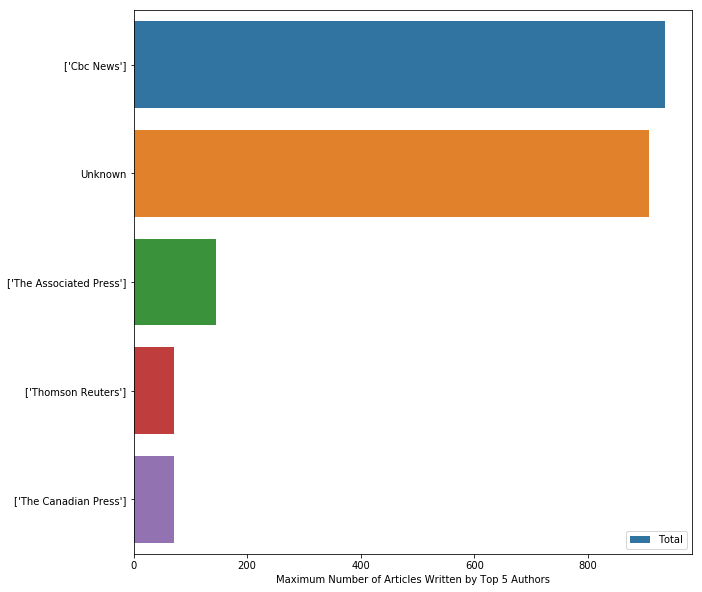

In [9]:
f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x = "freq" , y = "authors" , data = authors_pd , label = 'Total')
sns.set_color_codes("muted")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Maximum Number of Articles Written by Top 5 Authors")

In [10]:
news['Unnamed: 0'].count()

2817

In [11]:
cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,3))
cv_reviews=cv.fit_transform(news.text)

In [12]:
cv_reviews

<2817x1363701 sparse matrix of type '<class 'numpy.int64'>'
	with 1363701 stored elements in Compressed Sparse Row format>

In [13]:
cv.vocabulary_

{'tadrous': 1102966,
 'jacalyn': 628846,
 'duffin': 371401,
 'kas': 639077,
 'roussy': 977745,
 'refillsnew': 946145,
 'canadian pharmacies': 223851,
 'much medication': 738891,
 'be dispensed': 160111,
 'dispensed to': 353884,
 'shortages recognizing': 1034443,
 'active ingredients': 40845,
 'for drugs': 443295,
 'drugs come': 370734,
 'provincial regulatory': 919980,
 'medications given': 710641,
 'from refilling': 462942,
 'refilling prescriptions': 946100,
 'ensure life': 392313,
 'saving drugs': 1000522,
 'drugs don': 370738,
 'when supply': 1313499,
 'vulnerable mina': 1283328,
 'mina tadrous': 719501,
 'tadrous is': 1102967,
 'who monitors': 1321705,
 'monitors pharmaceutical': 727592,
 'pharmaceutical supplies': 876216,
 'drugs after': 370708,
 'been unfolding': 171356,
 'spreads he': 1066083,
 'about drugs': 33779,
 'saving inhalers': 1000537,
 'inhalers that': 592288,
 'might stockpile': 717577,
 'stockpile based': 1078566,
 'misinformation circulating': 722154,
 'circulating

In [14]:
len(cv.vocabulary_)

1363701

In [15]:
print(news.columns)


Index(['Unnamed: 0', 'authors', 'title', 'publish_timestamp', 'description',
       'text', 'url', 'title_length', 'description_length', 'text_length',
       'data', 'time'],
      dtype='object')


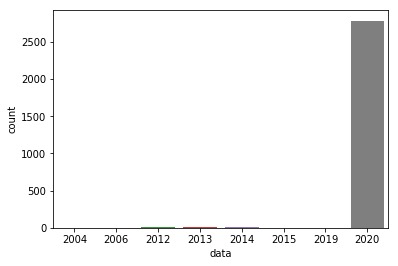

In [16]:
sns.countplot(news['data'].astype('datetime64').dt.year)

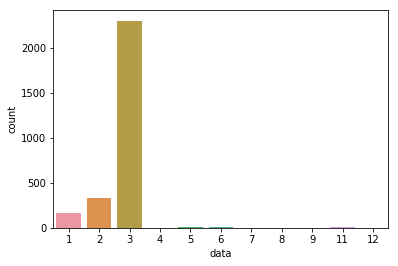

In [17]:
sns.countplot(news['data'].astype('datetime64').dt.month)

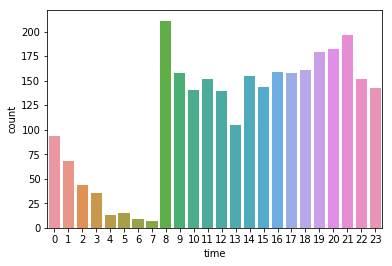

In [18]:
sns.countplot(news['time'].astype('datetime64').dt.hour)

In [19]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\li5me\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [20]:
stop_words = set(stopwords.words('english')) 

def text_cleaner(text,num):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
  
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    if(num==0):
        tokens = [w for w in newString.split() if not w in stop_words]
    else:
        tokens=newString.split()
    long_words=[]
    for i in tokens:
        if len(i)>1:                                                
            long_words.append(i)   
    return (" ".join(long_words)).strip()

In [21]:
#call the function
cleaned_text = []
for t in news['text']:
    cleaned_text.append(text_cleaner(t,0)) 

In [22]:
cleaned_summary = []
for t in news['title']:
    cleaned_summary.append(text_cleaner(t,0))

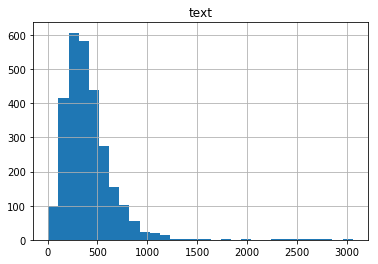

In [24]:
news['cleaned_text']=cleaned_text
news['cleaned_summary']=cleaned_summary
text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in news['cleaned_text']:
      text_word_count.append(len(i.split()))

for i in news['cleaned_summary']:
      summary_word_count.append(len(i.split()))

length_df = pd.DataFrame({'text':text_word_count})
length_df2 = pd.DataFrame({'summary':summary_word_count})
length_df.hist(bins = 30)

plt.show()

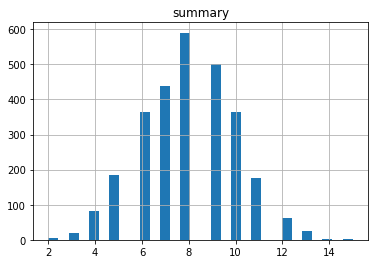

In [25]:
length_df2.hist(bins = 30)

plt.show()